In [3]:
!pip install torch torchvision opencv-python matplotlib


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [4]:
from google.colab import files
uploaded=files.upload()

Saving 2017-bestposter-justiceleague.jpg to 2017-bestposter-justiceleague.jpg


In [5]:
import torch

In [6]:
import torchvision

In [7]:
from torchvision.models.detection import maskrcnn_resnet50_fpn

In [8]:
import cv2

In [9]:
import matplotlib.pyplot as plt

In [10]:
from PIL import Image

In [11]:
import numpy as np

In [12]:
#Load pre-trained Mask R-CNN model

In [13]:
model=maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:02<00:00, 76.6MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [14]:

# Function to load image from uploaded files
def load_image(file_dict):
  image=None
  for fname in file_dict.keys():
    image=Image.open(fname).convert("RGB")
    return image

In [15]:
# Load image
image = load_image(uploaded)

In [16]:
# Transform the image for the model
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])
image_tensor = transform(image)

In [17]:

# Run the model on the image
with torch.no_grad():
    predictions = model([image_tensor])

In [18]:
# Get the masks and labels
masks = predictions[0]['masks']
labels = predictions[0]['labels']
scores = predictions[0]['scores']

In [19]:
# Visualize the segmentation
image_np = np.array(image)
for i in range(len(masks)):
    if scores[i] > 0.5:  # Only visualize confident predictions
        mask = masks[i, 0].numpy()
        label = labels[i].item()
        image_np[mask > 0.5] = (255, 0, 0)  # Highlight segmented area with red color


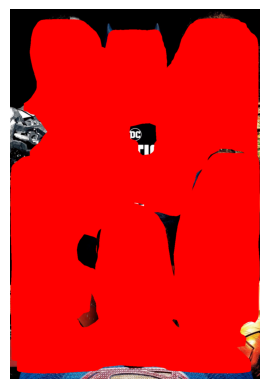

In [20]:
plt.imshow(image_np)
plt.axis('off')
plt.show()

In [21]:
!pip install torch torchvision opencv-python matplotlib sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [22]:
!pip install torch torchvision opencv-python matplotlib


In [23]:
import os

In [24]:
import sqlite3

In [25]:
from PIL import Image

In [26]:
import numpy as np

In [27]:
import torchvision.transforms as T

In [28]:
from google.colab import files

In [29]:

# Create directories for saving extracted objects and database
os.makedirs('extracted_objects', exist_ok=True)
os.makedirs('database', exist_ok=True)

In [30]:
# Connect to SQLite database (or create it)
conn = sqlite3.connect('database/segmented_objects.db')
cursor = conn.cursor()

In [31]:
# Create table for storing metadata
cursor.execute('''
CREATE TABLE IF NOT EXISTS objects (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    master_id TEXT,
    object_id TEXT,
    image_path TEXT
)
''')

In [32]:
# Function to save image with metadata
def save_object_image(image, master_id, object_id):
    image_path = f'extracted_objects/{object_id}.png'
    image.save(image_path)

    # Insert metadata into database
    cursor.execute('''
    INSERT INTO objects (master_id, object_id, image_path)
    VALUES (?, ?, ?)
    ''', (master_id, object_id, image_path))

    conn.commit()

In [33]:
# Function to load image from uploaded files
def load_image(file_dict):
    image = None
    for fname in file_dict.keys():
        image = Image.open(fname).convert("RGB")
    return image

In [34]:
# Upload image
uploaded = files.upload()

Saving 2017-bestposter-justiceleague.jpg to 2017-bestposter-justiceleague (1).jpg


In [35]:
# Load image
image = load_image(uploaded)


In [36]:
# Transform the image for the model
transform = T.Compose([
    T.ToTensor(),
])
image_tensor = transform(image)

In [37]:
# Run the model on the image
with torch.no_grad():
    predictions = model([image_tensor])

In [38]:
# Get the masks and labels
masks = predictions[0]['masks']
scores = predictions[0]['scores']

In [39]:
# Generate unique master ID for the original image
master_id = 'master_' + str(np.random.randint(10000))


In [40]:
# Extract and save objects
for i in range(len(masks)):
    if scores[i] > 0.5:  # Only save confident predictions
        mask = masks[i, 0].numpy()
        obj_image = Image.fromarray((mask * 255).astype(np.uint8))
        obj_image = Image.composite(image, Image.new("RGB", image.size), obj_image)


In [41]:
 # Generate unique object ID
object_id = master_id + '_obj_' + str(i)

In [42]:
# Save object image and metadata
save_object_image(obj_image, master_id, object_id)

In [43]:
# Close the database connection
conn.close()

In [44]:
print("Object extraction and storage completed successfully.")

Object extraction and storage completed successfully.


In [45]:
!pip install torch torchvision opencv-python matplotlib transformers


In [46]:
import os

In [47]:
import sqlite3

In [48]:
import torch

In [49]:
!pip install torch torchvision opencv-python matplotlib transformers git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-5zmmk0j0
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-5zmmk0j0
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.5 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369492 sha256=a63ac5bc1daea15298029fb413912acb19f292fa4e50fb0a940724ad41cd0ceb
  Stored in directory: /tmp/pip-ephem-wheel-cache-q0q61g8b/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [50]:
import clip

In [51]:
from PIL import Image

In [52]:
from transformers import CLIPProcessor,CLIPModel

In [53]:
import pandas as pd

In [54]:
# Load CLIP model and processor
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 119MiB/s]


In [55]:
# Connect to SQLite database
conn = sqlite3.connect('database/segmented_objects.db')
cursor = conn.cursor()

In [56]:
# Fetch object images and metadata from the database
cursor.execute("SELECT object_id, image_path FROM objects")
rows = cursor.fetchall()

In [57]:
descriptions = []

In [58]:
for row in rows:
    object_id, image_path = row
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

In [59]:
   # Define the set of possible text descriptions
text_descriptions = ["a person", "a car", "a chair", "a desk", "a computer", "a phone", "a book",
        "a cup", "a bag", "a bottle", "a keyboard", "a mouse", "a plant"]
text_inputs = clip.tokenize(text_descriptions).to(device)

In [60]:
 # Generate features
with torch.no_grad():
  image_features = model.encode_image(image)
  text_features = model.encode_text(text_inputs)

In [61]:
 # Calculate similarity
 image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)


In [62]:
# Find the most similar text description
values, indices = similarity[0].topk(1)
description = text_descriptions[indices.item()]
descriptions.append({"object_id": object_id, "description": description})

In [63]:
# Save descriptions to a CSV file
descriptions_df = pd.DataFrame(descriptions)
descriptions_df.to_csv('object_descriptions.csv', index=False)

In [64]:

# Close the database connection
conn.close()

In [65]:

print("Object identification and description completed successfully.")

Object identification and description completed successfully.


In [66]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 15.3 MB/s eta 0:00:00


In [67]:
import os
import sqlite3
import easyocr
from PIL import Image
import pandas as pd

In [68]:
# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [69]:
# Connect to SQLite database
conn = sqlite3.connect('database/segmented_objects.db')
cursor = conn.cursor()

In [70]:
# Fetch object images and metadata from the database
cursor.execute("SELECT object_id, image_path FROM objects")
rows = cursor.fetchall()

In [71]:
text_data = []

In [72]:
for row in rows:
    object_id, image_path = row
    image = Image.open(image_path)

In [73]:
# Perform OCR to extract text
result = reader.readtext(image_path)
extracted_text = " ".join([res[1] for res in result])

text_data.append({"object_id": object_id, "extracted_text": extracted_text})


In [74]:
# Save extracted text to a CSV file
text_data_df = pd.DataFrame(text_data)
text_data_df.to_csv('extracted_text_data.csv', index=False)

In [75]:
# Close the database connection
conn.close()

In [76]:
print("Text extraction and storage completed successfully.")

Text extraction and storage completed successfully.


In [77]:
!pip install transformers


In [78]:
import pandas as pd
from transformers import pipeline

In [79]:
# Load extracted text data
text_data_df = pd.read_csv('extracted_text_data.csv')
descriptions_df = pd.read_csv('object_descriptions.csv')

In [80]:
# Merge descriptions with extracted text data
data_df = pd.merge(descriptions_df, text_data_df, on="object_id")

In [81]:
# Initialize summarization pipeline
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [82]:
summaries = []

In [83]:
for index, row in data_df.iterrows():
    object_id = row['object_id']
    description = row['description']
    extracted_text = row['extracted_text']

In [84]:
 # Combine description and extracted text
combined_text = f"Description: {description}. Extracted text: {extracted_text}"


In [85]:
 # Generate summary
summary = summarizer(combined_text, max_length=50, min_length=25, do_sample=False)[0]['summary_text']

Your max_length is set to 50, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


In [86]:
summaries.append({"object_id": object_id, "summary": summary})

In [87]:
# Save summaries to a CSV file
summaries_df = pd.DataFrame(summaries)
summaries_df.to_csv('object_summaries.csv', index=False)

In [88]:
print("Summarization of object attributes completed successfully.")

Summarization of object attributes completed successfully.


In [89]:
import pandas as pd
import json


In [90]:
import sqlite3
import pandas as pd
import json


In [91]:
# Step 1: Connect to SQLite Database and Read Data
conn = sqlite3.connect('database/segmented_objects.db')

# List all tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:", tables)

# Read data from the correct table 'objects'
object_metadata = pd.read_sql_query("SELECT object_id, master_id, image_path FROM objects", conn)

# Close the connection
conn.close()

# Step 2: Load Other CSV Files
descriptions = pd.read_csv('object_descriptions.csv', encoding='latin1')
extracted_text = pd.read_csv('extracted_text_data.csv', encoding='latin1')
summaries = pd.read_csv('object_summaries.csv', encoding='latin1')

# Step 3: Merge DataFrames
merged_data = object_metadata.merge(descriptions, on='object_id')\
                             .merge(extracted_text, on='object_id')\
                             .merge(summaries, on='object_id')

# Step 4: Create Data Mapping
data_mapping = {}

for _, row in merged_data.iterrows():
    master_id = row['master_id']
    object_id = row['object_id']

    if master_id not in data_mapping:
        data_mapping[master_id] = {"objects": []}

    object_data = {
        "object_id": object_id,
        "image_path": row['image_path'],
        "description": row['description'],
        "extracted_text": row['extracted_text'],
        "summary": row['summary']
    }

    data_mapping[master_id]["objects"].append(object_data)

# Save the data mapping to a JSON file
with open('data_mapping.json', 'w') as f:
    json.dump(data_mapping, f, indent=4)

print("Data mapping completed successfully.")

Tables in the database:               name
0          objects
1  sqlite_sequence
Data mapping completed successfully.


In [92]:
import sqlite3
import pandas as pd
import json

# Connect to the SQLite database
conn = sqlite3.connect('database/segmented_objects.db')

# List all tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:", tables)

# Read data from the correct table 'objects'
object_metadata = pd.read_sql_query("SELECT object_id, master_id, image_path FROM objects", conn)

# Close the connection
conn.close()


Tables in the database:               name
0          objects
1  sqlite_sequence


In [93]:
# Load other CSV files with correct encoding
descriptions = pd.read_csv('object_descriptions.csv', encoding='latin1')
extracted_text = pd.read_csv('extracted_text_data.csv', encoding='latin1')
summaries = pd.read_csv('object_summaries.csv', encoding='latin1')


In [94]:
# Merge all dataframes on object_id
merged_data = object_metadata.merge(descriptions, on='object_id')\
                             .merge(extracted_text, on='object_id')\
                             .merge(summaries, on='object_id')

# Create a dictionary to hold the data mapping
data_mapping = {}

for _, row in merged_data.iterrows():
    master_id = row['master_id']
    object_id = row['object_id']

    if master_id not in data_mapping:
        data_mapping[master_id] = {"objects": []}

    object_data = {
        "object_id": object_id,
        "image_path": row['image_path'],
        "description": row['description'],
        "extracted_text": row['extracted_text'],
        "summary": row['summary']
    }

    data_mapping[master_id]["objects"].append(object_data)

# Save the data mapping to a JSON file
with open('data_mapping.json', 'w') as f:
    json.dump(data_mapping, f, indent=4)

print("Data mapping completed successfully.")


Data mapping completed successfully.


In [95]:
pip install streamlit


In [96]:
import streamlit as st
import easyocr
from transformers import pipeline  # Example for NLP model
import torch
from torchvision import models  # Example for image segmentation model


# Initialize models (assume functions to load them are defined)
reader = easyocr.Reader(['en'])
segmentation_model = image


In [97]:
import os
import sqlite3
from PIL import Image
import numpy as np
import torchvision.transforms as T
from google.colab import files
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn
import easyocr
from transformers import pipeline

# Create directories for saving extracted objects and database
os.makedirs('extracted_objects', exist_ok=True)
os.makedirs('database', exist_ok=True)

# Connect to SQLite database (or create it)
conn = sqlite3.connect('database/segmented_objects.db')
cursor = conn.cursor()

# Create table for storing metadata
cursor.execute('''
CREATE TABLE IF NOT EXISTS objects (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    master_id TEXT,
    object_id TEXT,
    image_path TEXT
)
''')

# Function to save image with metadata
def save_object_image(image, master_id, object_id):
    image_path = f'extracted_objects/{object_id}.png'
    image.save(image_path)

    # Insert metadata into database
    cursor.execute('''
    INSERT INTO objects (master_id, object_id, image_path)
    VALUES (?, ?, ?)
    ''', (master_id, object_id, image_path))

    conn.commit()

# Function to load image from uploaded files
def load_image(file_dict):
    image = None
    for fname in file_dict.keys():
        image = Image.open(fname).convert("RGB")
    return image

# Upload image
uploaded = files.upload()

# Load image
image = load_image(uploaded)

# Transform the image for the model
transform = T.Compose([
    T.ToTensor(),
])
image_tensor = transform(image)

# Load a pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Run the model on the image
with torch.no_grad():
    predictions = model([image_tensor])

# Get the masks and labels
masks = predictions[0]['masks']
scores = predictions[0]['scores']

# Generate unique master ID for the original image
master_id = 'master_' + str(np.random.randint(10000))

# Extract and save objects
for i in range(len(masks)):
    if scores[i] > 0.5:  # Only save confident predictions
        mask = masks[i, 0].numpy()
        obj_image = Image.fromarray((mask * 255).astype(np.uint8))
        obj_image = Image.composite(image, Image.new("RGB", image.size), obj_image)

        # Generate unique object ID
        object_id = master_id + '_obj_' + str(i)

        # Save object image and metadata
        save_object_image(obj_image, master_id, object_id)

# Close the database connection
conn.close()

print("Object extraction and storage completed successfully.")


Saving 2017-bestposter-justiceleague.jpg to 2017-bestposter-justiceleague (2).jpg


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Object extraction and storage completed successfully.


In [98]:
import streamlit as st

@st.cache_data
def load_data():
    # your data loading code
    return data



2024-08-04 14:50:11.523 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [99]:
import streamlit as st
import easyocr
from PIL import Image

st.title("Object Detection and Analysis")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Processing...")

    # Assume you have already defined a function to process the image and get results
    results = process_image(image)

    st.write("Results:")
    st.write(results)


2024-08-04 14:50:11.956 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [100]:
!pip install pyngrok


In [101]:
!ngrok authtoken YOUR_AUTHTOKEN


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [102]:
!pip install streamlit easyocr transformers torch torchvision pyngrok


In [103]:
import streamlit as st
import easyocr
from PIL import Image
from pyngrok import ngrok
import subprocess
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn

st.title("Object Detection and Analysis")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Processing...")


In [104]:
# Function to process the image and get results (dummy example)
def process_image(image):
 return "Sample results"
results = process_image(image)
st.write("Results:")
st.write(results)

In [105]:
import streamlit as st
import easyocr
from PIL import Image
from pyngrok import ngrok
import subprocess
import torch
from torchvision import transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from transformers import pipeline



In [106]:
detection_model = maskrcnn_resnet50_fpn(pretrained=True)
detection_model.eval()
summarizer = pipeline("summarization")


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [107]:
reader = easyocr.Reader(['en'])


In [108]:
def detect_objects(image):
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        outputs = detection_model(image_tensor)
    return outputs


In [109]:
def extract_text(image):
    results = reader.readtext(np.array(image))
    text = " ".join([res[1] for res in results])
    return text


In [110]:
def summarize_text(text):
    summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
    return summary[0]['summary_text']


In [111]:
st.title("Object Detection and Analysis")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Processing...")

    # Object detection
    detection_results = detect_objects(image)
    boxes = detection_results[0]['boxes'].data.numpy()
    labels = detection_results[0]['labels'].data.numpy()
    scores = detection_results[0]['scores'].data.numpy()

    # Extract text and summarize for each detected object
    objects_data = []
    for i, box in enumerate(boxes):
        if scores[i] > 0.5:  # Confidence threshold
            obj_image = image.crop((box[0], box[1], box[2], box[3]))
            text = extract_text(obj_image)
            summary = summarize_text(text)
            objects_data.append({
                'label': labels[i],
                'text': text,
                'summary': summary
            })

    st.write("Results:")
    for obj_data in objects_data:
        st.write(f"Label: {obj_data['label']}")
        st.write(f"Extracted Text: {obj_data['text']}")
        st.write(f"Summary: {obj_data['summary']}")


In [112]:
!ngrok authtoken 2k8oU7P1jQWl9MwExUjvkDsuvsS_6PSHjqt2oJy7VjDsFdXnz


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [113]:
import streamlit as st
import easyocr
from PIL import Image
import numpy as np
from pyngrok import ngrok
import subprocess
import torch
from torchvision import transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from transformers import pipeline

# Load models
detection_model = maskrcnn_resnet50_fpn(pretrained=True)
detection_model.eval()
summarizer = pipeline("summarization")

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Define function for object detection
def detect_objects(image):
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        outputs = detection_model(image_tensor)
    return outputs

# Define function for text extraction
def extract_text(image):
    results = reader.readtext(np.array(image))
    text = " ".join([res[1] for res in results])
    return text

# Define function for summarization
def summarize_text(text):
    summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
    return summary[0]['summary_text']

st.title("Object Detection and Analysis")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Processing...")

    # Object detection
    detection_results = detect_objects(image)
    boxes = detection_results[0]['boxes'].data.numpy()
    labels = detection_results[0]['labels'].data.numpy()
    scores = detection_results[0]['scores'].data.numpy()

    # Extract text and summarize for each detected object
    objects_data = []
    for i, box in enumerate(boxes):
        if scores[i] > 0.5:  # Confidence threshold
            obj_image = image.crop((box[0], box[1], box[2], box[3]))
            text = extract_text(obj_image)
            summary = summarize_text(text)
            objects_data.append({
                'label': labels[i],
                'text': text,
                'summary': summary
            })

    st.write("Results:")
    for obj_data in objects_data:
        st.write(f"Label: {obj_data['label']}")
        st.write(f"Extracted Text: {obj_data['text']}")
        st.write(f"Summary: {obj_data['summary']}")

# Save the Streamlit script
with open('app.py', 'w') as f:
    f.write("""
import streamlit as st
import easyocr
from PIL import Image
import numpy as np
import torch
from torchvision import transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from transformers import pipeline

# Load models
detection_model = maskrcnn_resnet50_fpn(pretrained=True)
detection_model.eval()
summarizer = pipeline("summarization")

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Define function for object detection
def detect_objects(image):
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        outputs = detection_model(image_tensor)
    return outputs

# Define function for text extraction
def extract_text(image):
    results = reader.readtext(np.array(image))
    text = " ".join([res[1] for res in results])
    return text

# Define function for summarization
def summarize_text(text):
    summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
    return summary[0]['summary_text']

st.title("Object Detection and Analysis")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Processing...")

    # Object detection
    detection_results = detect_objects(image)
    boxes = detection_results[0]['boxes'].data.numpy()
    labels = detection_results[0]['labels'].data.numpy()
    scores = detection_results[0]['scores'].data.numpy()

    # Extract text and summarize for each detected object
    objects_data = []
    for i, box in enumerate(boxes):
        if scores[i] > 0.5:  # Confidence threshold
            obj_image = image.crop((box[0], box[1], box[2], box[3]))
            text = extract_text(obj_image)
            summary = summarize_text(text)
            objects_data.append({
                'label': labels[i],
                'text': text,
                'summary': summary
            })

    st.write("Results:")
    for obj_data in objects_data:
        st.write(f"Label: {obj_data['label']}")
        st.write(f"Extracted Text: {obj_data['text']}")
        st.write(f"Summary: {obj_data['summary']}")
    """)

# Run the Streamlit app with Ngrok
command = "streamlit run app.py"
process = subprocess.Popen(command, shell=True)
url = ngrok.connect(8501)
print(f"Streamlit app is live at: {url}")


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Streamlit app is live at: NgrokTunnel: "https://85f9-34-16-227-172.ngrok-free.app" -> "http://localhost:8501"


In [114]:
!pip install pandas


In [115]:
import streamlit as st
import easyocr
from PIL import Image
import numpy as np
import torch
from torchvision import transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from transformers import pipeline
import pandas as pd

# Load models
detection_model = maskrcnn_resnet50_fpn(pretrained=True)
detection_model.eval()
summarizer = pipeline("summarization")

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Define function for object detection
def detect_objects(image):
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        outputs = detection_model(image_tensor)
    return outputs

# Define function for text extraction
def extract_text(image):
    results = reader.readtext(np.array(image))
    text = " ".join([res[1] for res in results])
    return text

# Define function for summarization
def summarize_text(text):
    summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
    return summary[0]['summary_text']

st.title("Object Detection and Analysis")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Processing...")

    # Object detection
    detection_results = detect_objects(image)
    boxes = detection_results[0]['boxes'].data.numpy()
    labels = detection_results[0]['labels'].data.numpy()
    scores = detection_results[0]['scores'].data.numpy()

    # Prepare data for summary table
    objects_data = []
    for i, box in enumerate(boxes):
        if scores[i] > 0.5:  # Confidence threshold
            obj_image = image.crop((box[0], box[1], box[2], box[3]))
            text = extract_text(obj_image)
            summary = summarize_text(text)
            objects_data.append({
                'Object ID': i,
                'Class Label': labels[i],
                'Confidence Score': scores[i],
                'Bounding Box Coordinates': box,
                'Extracted Text': text,
                'Summary': summary
            })

    # Create a DataFrame for the summary table
    df = pd.DataFrame(objects_data)

    st.write("Results:")
    st.table(df)


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [116]:
import streamlit as st
import easyocr
from PIL import Image
import numpy as np
import torch
from torchvision import transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from transformers import pipeline
import pandas as pd
from pyngrok import ngrok
import subprocess

# Load models
detection_model = maskrcnn_resnet50_fpn(pretrained=True)
detection_model.eval()
summarizer = pipeline("summarization")

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Define function for object detection
def detect_objects(image):
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        outputs = detection_model(image_tensor)
    return outputs

# Define function for text extraction
def extract_text(image):
    results = reader.readtext(np.array(image))
    text = " ".join([res[1] for res in results])
    return text

# Define function for summarization
def summarize_text(text):
    summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
    return summary[0]['summary_text']

st.title("Object Detection and Analysis")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Processing...")

    # Object detection
    detection_results = detect_objects(image)
    boxes = detection_results[0]['boxes'].data.numpy()
    labels = detection_results[0]['labels'].data.numpy()
    scores = detection_results[0]['scores'].data.numpy()

    # Prepare data for summary table
    objects_data = []
    for i, box in enumerate(boxes):
        if scores[i] > 0.5:  # Confidence threshold
            obj_image = image.crop((box[0], box[1], box[2], box[3]))
            text = extract_text(obj_image)
            summary = summarize_text(text)
            objects_data.append({
                'Object ID': i,
                'Class Label': labels[i],
                'Confidence Score': scores[i],
                'Bounding Box Coordinates': box,
                'Extracted Text': text,
                'Summary': summary
            })

    # Create a DataFrame for the summary table
    df = pd.DataFrame(objects_data)

    st.write("Results:")
    st.table(df)

# Save the Streamlit script
with open('app.py', 'w') as f:
    f.write("""
import streamlit as st
import easyocr
from PIL import Image
import numpy as np
import torch
from torchvision import transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from transformers import pipeline
import pandas as pd

# Load models
detection_model = maskrcnn_resnet50_fpn(pretrained=True)
detection_model.eval()
summarizer = pipeline("summarization")

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Define function for object detection
def detect_objects(image):
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        outputs = detection_model(image_tensor)
    return outputs

# Define function for text extraction
def extract_text(image):
    results = reader.readtext(np.array(image))
    text = " ".join([res[1] for res in results])
    return text

# Define function for summarization
def summarize_text(text):
    summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
    return summary[0]['summary_text']

st.title("Object Detection and Analysis")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Processing...")

    # Object detection
    detection_results = detect_objects(image)
    boxes = detection_results[0]['boxes'].data.numpy()
    labels = detection_results[0]['labels'].data.numpy()
    scores = detection_results[0]['scores'].data.numpy()

    # Prepare data for summary table
    objects_data = []
    for i, box in enumerate(boxes):
        if scores[i] > 0.5:  # Confidence threshold
            obj_image = image.crop((box[0], box[1], box[2], box[3]))
            text = extract_text(obj_image)
            summary = summarize_text(text)
            objects_data.append({
                'Object ID': i,
                'Class Label': labels[i],
                'Confidence Score': scores[i],
                'Bounding Box Coordinates': box,
                'Extracted Text': text,
                'Summary': summary
            })

    # Create a DataFrame for the summary table
    df = pd.DataFrame(objects_data)

    st.write("Results:")
    st.table(df)
    """)

# Run the Streamlit app with Ngrok
command = "streamlit run app.py"
process = subprocess.Popen(command, shell=True)
url = ngrok.connect(8501)
print(f"Streamlit app is live at: {url}")


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Streamlit app is live at: NgrokTunnel: "https://5c20-34-16-227-172.ngrok-free.app" -> "http://localhost:8501"


# New Section